In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

In [2]:
df = pd.read_csv("/home/adhil/Downloads/DOGE-USD.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [3]:
data = df.copy()

In [4]:
df = df.drop("Date", 1)

/tmp/ipykernel_52935/4184526603.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Date", 1)


In [5]:
df.shape

(1532, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1532 non-null   float64
 1   High    1532 non-null   float64
 2   Low     1532 non-null   float64
 3   Close   1532 non-null   float64
 4   Volume  1532 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 60.0 KB


In [7]:
target = df[["Close"]]

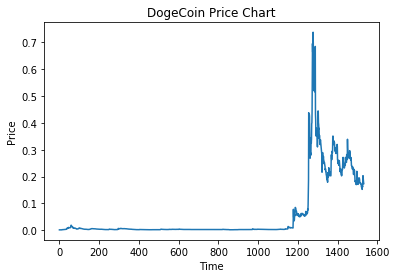

In [10]:
plt.plot(df['High'])

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DogeCoin Price Chart")
plt.show()

In [11]:
X = df.drop("High", 1)

y = df["High"]

/tmp/ipykernel_52935/3844870976.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("High", 1)


In [12]:
# split into train test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1225, 4)
Shape of y_train =  (1225,)
Shape of X_test =  (307, 4)
Shape of y_test =  (307,)


In [13]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse')

regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [14]:
regressor.score(X_test, y_test)

0.9982594383583046

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df2 = pd.DataFrame()

df2['High'] = y_test
df2['Prediction'] = y_pred
df2.head(10)

,High,Prediction
559,0.003091,0.003166
1456,0.270865,0.277305
910,0.002678,0.002683
311,0.006531,0.006704
1015,0.003499,0.003594
955,0.002478,0.002493
1145,0.004716,0.004759
329,0.005767,0.005846
506,0.002166,0.002112
1466,0.271257,0.270497


In [25]:
#saving the machine learning model

joblib.dump(regressor,"/home/adhil/Music/model.pkl")


['/home/adhil/Music/model.pkl']